In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

## Titanic
data_titanic = pd.read_csv("data/titanic/train.csv")

column_titanic_dict = {"PassengerId": "PassengerId", "Survived": "Survived", "Pclass": "TicketClass", "Name": "Name", "Sex": "Sex", "Age": "Age", "SibSp": "NumberSiblingsSpouses", "Parch": "NumberParentsChildren", "Ticket": "TicketNumber", "Fare": "Fare", "Cabin": "CabinNumber", "Embarked": "Port"}
data_titanic = data_titanic.rename(columns=column_titanic_dict)

train_X_titanic_columns = ["TicketClass", "Sex", "Age", "NumberSiblingsSpouses", "NumberParentsChildren", "Fare", "Port"]
train_y_titanic_columns = ["Survived"]
train_X_titanic_ordinal_columns = ["Sex", "Port"]

X_titanic = data_titanic[train_X_titanic_columns]
y_titanic = data_titanic[train_y_titanic_columns]
 
X_titanic.loc[:, train_X_titanic_ordinal_columns] = OrdinalEncoder().fit_transform(X_titanic[train_X_titanic_ordinal_columns])

X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic, test_size=0.4)
y_titanic_train = np.squeeze(y_titanic_train)
y_titanic_test = np.squeeze(y_titanic_test)

## Machine Failure
data_machine_failure = pd.read_csv("data/machine_failure/train.csv")

column_machine_failure_dict = {"PassengerId": "PassengerId", "Survived": "Survived", "Pclass": "TicketClass", "Name": "Name", "Sex": "Sex", "Age": "Age", "SibSp": "NumberSiblingsSpouses", "Parch": "NumberParentsChildren", "Ticket": "TicketNumber", "Fare": "Fare", "Cabin": "CabinNumber", "Embarked": "Port"}
data_machine_failure = data_machine_failure.rename(columns=column_machine_failure_dict)

train_X_machine_failure_columns = ["TicketClass", "Sex", "Age", "NumberSiblingsSpouses", "NumberParentsChildren", "Fare", "Port"]
train_y_machine_failure_columns = ["Survived"]
train_X_machine_failure_ordinal_columns = ["Sex", "Port"]

X_machine_failure = data_machine_failure[train_X_machine_failure_columns]
y_machine_failure = data_machine_failure[train_y_machine_failure_columns]
 
X_machine_failure.loc[:, train_X_machine_failure_ordinal_columns] = OrdinalEncoder().fit_transform(X_machine_failure[train_X_machine_failure_ordinal_columns])

X_machine_failure_train, X_machine_failure_test, y_machine_failure_train, y_machine_failure_test = train_test_split(X_machine_failure, y_machine_failure, test_size=0.4)
y_machine_failure_train = np.squeeze(y_machine_failure_train)
y_machine_failure_test = np.squeeze(y_machine_failure_test)

## Synthetic
X_synthetic = np.random.randn(int(3e3)).reshape([int(1e3), 3])
y_synthetic = X_synthetic[:, 0] + X_synthetic[:, 1] + X_synthetic[:, 2] > 0
yn_synthetic = np.logical_not(y_synthetic)

X_synthetic[y_synthetic, :] += np.array([1, 1, 1]) * 0.1
X_synthetic[yn_synthetic, :] -= np.array([1, 1, 1]) * 0.1

X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(X_synthetic, y_synthetic, test_size=0.4)
y_synthetic_train = np.squeeze(y_synthetic_train)
y_synthetic_test = np.squeeze(y_synthetic_test)

/opt/homebrew/anaconda3/envs/kaggle/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/var/folders/3f/d8gl3k3j0bn3wk_cqjvfm31w0000gn/T/ipykernel_14198/3784963557.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_titanic.loc[:, train_X_titanic_ordinal_columns] = OrdinalEncoder().fit_transform(X_titanic[train_X_titanic_ordinal_columns])
/var/folders/3f/d8gl3k3j0bn3wk_cqjvfm31w0000gn/T/ipykernel_14198/3784963557.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [5]:
## Standard Scaler

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

param_grid = [
  {"lda_clf__shrinkage": [None, "auto"] + np.linspace(0, 1, 10).tolist()}
]

lda_clf = GridSearchCV(Pipeline([
    ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ("lda_clf", LinearDiscriminantAnalysis(solver="lsqr")),]),
    param_grid, cv=10, verbose=0)

## Titanic
print("Titanic")
lda_clf.fit(X_titanic_train, y_titanic_train)
y_titanic_lda_clf_pred = lda_clf.predict(X_titanic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_titanic_test, y_titanic_lda_clf_pred))
print("Precision Score")
print(precision_score(y_titanic_test, y_titanic_lda_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_titanic_test, y_titanic_lda_clf_pred))
print("Recall Score")
print(recall_score(y_titanic_test, y_titanic_lda_clf_pred))
print("F1 Score")
print(f1_score(y_titanic_test, y_titanic_lda_clf_pred))
print("Best Estimator")
print(lda_clf.best_estimator_)
print("Best Parameters")
print(lda_clf.best_params_)

print("")
## Machine Failure
print("Machine Failure")
lda_clf.fit(X_machine_failure_train, y_machine_failure_train)
y_machine_failure_lda_clf_pred = lda_clf.predict(X_machine_failure_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Precision Score")
print(precision_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Recall Score")
print(recall_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("F1 Score")
print(f1_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Best Estimator")
print(lda_clf.best_estimator_)
print("Best Parameters")
print(lda_clf.best_params_)

print("")
## Synthetic
print("Synthetic")
lda_clf.fit(X_synthetic_train, y_synthetic_train)
y_synthetic_lda_clf_pred = lda_clf.predict(X_synthetic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Precision Score")
print(precision_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Recall Score")
print(recall_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("F1 Score")
print(f1_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Best Estimator")
print(lda_clf.best_estimator_)
print("Best Parameters")
print(lda_clf.best_params_)

Titanic
Confusion Matrix
[[193  34]
 [ 43  87]]
Precision Score
0.71900826446281
Accuracy Score
0.7843137254901961
Recall Score
0.6692307692307692
F1 Score
0.6932270916334662
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lda_clf',
                 LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'))])
Best Parameters
{'lda_clf__shrinkage': 'auto'}

Machine Failure
Confusion Matrix
[[181  30]
 [ 52  94]]
Precision Score
0.7580645161290323
Accuracy Score
0.7703081232492998
Recall Score
0.6438356164383562
F1 Score
0.6962962962962962
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lda_clf', LinearDiscriminantAnalysis(solver='lsqr'))])
Best Parameters
{'lda_clf__shrinkage': None}

Synthetic
Confusion Matrix
[[208   1]
 [  0 191]]
Precision Score
0.9947916666666666
Accuracy Score
0.9975
Recall Score
1.0
F1 Score
0.9973890339425587
Best Estimator
Pipeline(steps=[

In [6]:
## Min Max Scaler

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

param_grid = [
  {"lda_clf__shrinkage": [None, "auto"] + np.linspace(0, 1, 10).tolist()}
]

lda_clf = GridSearchCV(Pipeline([
    ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("lda_clf", LinearDiscriminantAnalysis(solver="lsqr")),]),
    param_grid, cv=10, verbose=0)

## Titanic
print("Titanic")
lda_clf.fit(X_titanic_train, y_titanic_train)
y_titanic_lda_clf_pred = lda_clf.predict(X_titanic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_titanic_test, y_titanic_lda_clf_pred))
print("Precision Score")
print(precision_score(y_titanic_test, y_titanic_lda_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_titanic_test, y_titanic_lda_clf_pred))
print("Recall Score")
print(recall_score(y_titanic_test, y_titanic_lda_clf_pred))
print("F1 Score")
print(f1_score(y_titanic_test, y_titanic_lda_clf_pred))
print("Best Estimator")
print(lda_clf.best_estimator_)
print("Best Parameters")
print(lda_clf.best_params_)

print("")
## Machine Failure
print("Machine Failure")
lda_clf.fit(X_machine_failure_train, y_machine_failure_train)
y_machine_failure_lda_clf_pred = lda_clf.predict(X_machine_failure_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Precision Score")
print(precision_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Recall Score")
print(recall_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("F1 Score")
print(f1_score(y_machine_failure_test, y_machine_failure_lda_clf_pred))
print("Best Estimator")
print(lda_clf.best_estimator_)
print("Best Parameters")
print(lda_clf.best_params_)

print("")
## Synthetic
print("Synthetic")
lda_clf.fit(X_synthetic_train, y_synthetic_train)
y_synthetic_lda_clf_pred = lda_clf.predict(X_synthetic_test)
# Score
print("Confusion Matrix")
print(confusion_matrix(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Precision Score")
print(precision_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Accuracy Score")
print(accuracy_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Recall Score")
print(recall_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("F1 Score")
print(f1_score(y_synthetic_test, y_synthetic_lda_clf_pred))
print("Best Estimator")
print(lda_clf.best_estimator_)
print("Best Parameters")
print(lda_clf.best_params_)

Titanic
Confusion Matrix
[[193  34]
 [ 43  87]]
Precision Score
0.71900826446281
Accuracy Score
0.7843137254901961
Recall Score
0.6692307692307692
F1 Score
0.6932270916334662
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('lda_clf',
                 LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'))])
Best Parameters
{'lda_clf__shrinkage': 'auto'}

Machine Failure
Confusion Matrix
[[174  37]
 [ 52  94]]
Precision Score
0.7175572519083969
Accuracy Score
0.7507002801120448
Recall Score
0.6438356164383562
F1 Score
0.6787003610108303
Best Estimator
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('lda_clf',
                 LinearDiscriminantAnalysis(shrinkage=0.2222222222222222,
                                            solver='lsqr'))])
Best Parameters
{'lda_clf__shrinkage': 0.2222222222222222}

Synthetic
Confusion Matrix
[[208   1]
 [  0 191]]
Precision Score
0.99479166666666

/opt/homebrew/anaconda3/envs/kaggle/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'LDA and boundaries')

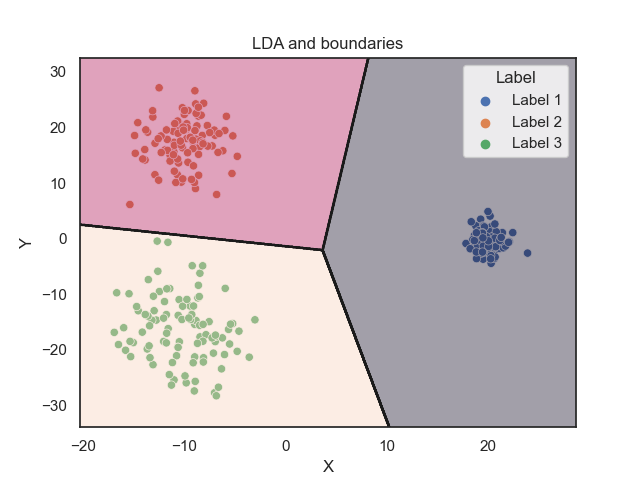

In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

N_class = 3
N_points = 100
N_sample = 1000

R = 20
phi = 2 * np.pi / N_class

label_list = ["Label {}".format(index+1) for index in range(N_class)]
mu_list = [[R * np.cos(phi * index) for index in range(N_class)], [R * np.sin(phi * index) for index in range(N_class)]]
sigma_list = [[index + 1 for index in range(N_class)], [2 * (index + 1) for index in range(N_class)]]

X = np.vstack([np.hstack([np.random.randn(N_points) * sigma + mu for mu, sigma in zip(mu_list[index], sigma_list[index])]) for index in range(2)]).T
y = np.array(list(itertools.chain(*[[label_list[index]] * N_points for index in range(N_class)])))

lda_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lda_clf", LinearDiscriminantAnalysis()),])
lda_clf.fit(X, y)

df = pd.DataFrame(data=X, columns=["x", "y"])
df["Label"] = y

margin = 0.2
x_min, x_max, y_min, y_max = np.min(X[:, 0]), np.max(X[:, 0]), np.min(X[:, 1]), np.max(X[:, 1])
x_sample_min, x_sample_max, y_sample_min, y_sample_max = x_min - np.abs(x_min) * margin, x_max + np.abs(x_max) * margin, y_min - np.abs(y_min) * margin, y_max + np.abs(y_max) * margin

xx_sample, yy_sample = np.meshgrid(np.linspace(x_sample_min, x_sample_max, N_sample), np.linspace(y_sample_min, y_sample_max, N_sample))
zz_sample = OrdinalEncoder().fit_transform(lda_clf.predict(np.vstack([np.ravel(xx_sample), np.ravel(yy_sample)]).T)[:, np.newaxis]).reshape(xx_sample.shape)

%matplotlib ipympl
sns.set_theme(style="white")
figure = sns.scatterplot(data=df, x="x", y="y", hue="Label")
ax = plt.gca()
ax.contourf(xx_sample, yy_sample, zz_sample, alpha =0.4)
ax.contour(xx_sample, yy_sample, zz_sample, alpha=1, colors="k")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('LDA and boundaries')